### Setting the working directory

Before loading the data, let's begin by setting the right working directory. In order to change the working directory, we use the `os` library:

In [4]:
import os
os.getcwd()

'/content'

Use the following line to change the working directory to the path where our python files and data files are saved in:

(The **new_path** is where I stored the data in my Google Drive. To run the code successfully, please create the necessary folder in your Google Drive and upload related data there)

In [5]:
#from google.colab import drive
#drive.mount('/content/drive', force_remount=True)
#new_path = '/content/drive/My Drive/IBM Mangrove Project'
#os.chdir(new_path)

In [6]:
# Verify the current working directory
#print("Current Working Directory:", os.getcwd())

### Importing Libraries

In [7]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, r2_score
from itertools import product
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

### **Indonesia**: Importing, Preparing, and Transforming the Data

Then, let's import and prepare our data for the regressions:

In [ ]:
# Install necessary libraries (if not already available in Colab)
#!pip install openpyxl  # If using Excel files that require openpyxl

In [8]:
India_And_Indonesia_Data = pd.read_excel('/content/India and Indonesia dataADB.xlsx')
Mangrove_by_country = pd.read_excel('/content/India and Indonesia dataADB.xlsx')

FileNotFoundError: [Errno 2] No such file or directory: '/content/India and Indonesia dataADB.xlsx'

In [ ]:
India_And_Indonesia_Data.head()

,Economy,Indicator,Unit of Measure,2000,2001,2002,2003,2004,2005,2006,...,2019,2020,2021,2022,Definition,Data Coverage,Calendar Year,Base Year,Source,Footnotes
0,Indonesia,GDP at current prices,Indonesian Rupiah,1389769850000000,1646322100000000,1821833360000000,2013674600000000,2295826200000000,2774281100000000,3339216800000000,...,15832657200000000,15438017500000000,16970789200000000,...,Unduplicated market value of the total product...,From 2000 to 2022,Calendar Year,NaN,BPS Statistics Indonesia,NaN
1,Indonesia,Agriculture (% of GDP),percent of GDP,15.60197,15.29026,15.45645,15.18535,14.33578,13.12662,12.9738,...,13.258161,14.221554,13.840219,...,Value-added of the agricultural sector as perc...,From 2000 to 2022,Calendar Year,NaN,BPS Statistics Indonesia,NaN
2,Indonesia,Industry (% of GDP),percent of GDP,45.9254,46.45484,44.46292,43.74957,44.62762,46.54106,46.94356,...,40.623372,39.700684,41.538108,...,Value-added of the industry sector as percent ...,From 2000 to 2022,Calendar Year,NaN,BPS Statistics Indonesia,NaN
3,Indonesia,Per capita GDP,Indonesian Rupiah,6737801.11,7890613.68,8616358.48,9398657.56,10576110.92,12618857.69,14991080.91,...,59060096.61,56938722.67,62236558.33535,...,"GDP at current prices, divided by the midyear ...",From 2000 to 2022,Calendar Year,NaN,2000–2020: BPS Statistics Indonesia. 2021: Asi...,NaN
4,Indonesia,"Road Indicators Network, Total (km)",kilometer,348083,352762,357026,357959,372928,391008,406569,...,544474,548366,...,...,This includes both paved and unpaved roads. Pa...,From 2000 to 2022,NaN,NaN,Asian Development Bank,NaN


In [ ]:
Mangrove_by_country.head()

,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
0,ABW,Aruba,-0.124582,-0.199713,-0.223008,-0.219329,-0.193405,-0.188766,-0.188766,-0.234624,-0.245901,-0.206250
1,AGO,Angola,-0.011747,-0.016882,-0.015821,-0.016643,-0.018458,-0.026758,-0.026546,-0.033867,-0.031261,-0.034054
2,AIA,Anguilla,-0.219696,-0.321891,-0.292101,-0.089057,0.107394,0.070885,0.032198,-0.089078,-0.171946,-0.160104
3,ARE,United Arab Emirates,0.048936,0.103596,0.075537,0.015019,-0.040036,-0.053395,-0.035717,-0.021875,-0.017115,-0.018510
4,ASM,American Samoa,-0.004212,-0.008459,-0.014159,-0.012815,-0.005687,-0.005647,-0.005647,-0.005647,-0.009883,-0.017014


In [ ]:
Indonesia_data_1 = India_And_Indonesia_Data[India_And_Indonesia_Data['Economy'] == 'Indonesia']
print(Indonesia_data_1.shape)
Indonesia_data_1.head()

(49, 32)


,Economy,Indicator,Unit of Measure,2000,2001,2002,2003,2004,2005,2006,...,2019,2020,2021,2022,Definition,Data Coverage,Calendar Year,Base Year,Source,Footnotes
0,Indonesia,GDP at current prices,Indonesian Rupiah,1389769850000000,1646322100000000,1821833360000000,2013674600000000,2295826200000000,2774281100000000,3339216800000000,...,15832657200000000,15438017500000000,16970789200000000,...,Unduplicated market value of the total product...,From 2000 to 2022,Calendar Year,NaN,BPS Statistics Indonesia,NaN
1,Indonesia,Agriculture (% of GDP),percent of GDP,15.60197,15.29026,15.45645,15.18535,14.33578,13.12662,12.9738,...,13.258161,14.221554,13.840219,...,Value-added of the agricultural sector as perc...,From 2000 to 2022,Calendar Year,NaN,BPS Statistics Indonesia,NaN
2,Indonesia,Industry (% of GDP),percent of GDP,45.9254,46.45484,44.46292,43.74957,44.62762,46.54106,46.94356,...,40.623372,39.700684,41.538108,...,Value-added of the industry sector as percent ...,From 2000 to 2022,Calendar Year,NaN,BPS Statistics Indonesia,NaN
3,Indonesia,Per capita GDP,Indonesian Rupiah,6737801.11,7890613.68,8616358.48,9398657.56,10576110.92,12618857.69,14991080.91,...,59060096.61,56938722.67,62236558.33535,...,"GDP at current prices, divided by the midyear ...",From 2000 to 2022,Calendar Year,NaN,2000–2020: BPS Statistics Indonesia. 2021: Asi...,NaN
4,Indonesia,"Road Indicators Network, Total (km)",kilometer,348083,352762,357026,357959,372928,391008,406569,...,544474,548366,...,...,This includes both paved and unpaved roads. Pa...,From 2000 to 2022,NaN,NaN,Asian Development Bank,NaN


In [ ]:
Indonesia_data_2 = Mangrove_by_country[Mangrove_by_country['Name'] == 'Indonesia']
print(Indonesia_data_2.shape)
Indonesia_data_2.head()

(1, 12)


,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
52,IDN,Indonesia,-0.030626,-0.044385,-0.048216,-0.051102,-0.057403,-0.06147,-0.063308,-0.063314,-0.062523,-0.059082


In [ ]:
# Set the first column as the index for transposition if it's not already set
Indonesia_data_1_copy_1 = Indonesia_data_1.set_index('Indicator')

# Transpose the DataFrame
Indonesia_data_1_transposed = Indonesia_data_1_copy_1.T

# Reset the index to turn the 'Year' index into a column
Indonesia_data_1_transposed = Indonesia_data_1_transposed.reset_index().rename(columns={'index': 'Year'})

print(Indonesia_data_1_transposed.shape)
Indonesia_data_1_transposed.head()

(31, 50)


Indicator,Year,GDP at current prices,Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
0,Economy,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,...,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia,Indonesia
1,Unit of Measure,Indonesian Rupiah,percent of GDP,percent of GDP,Indonesian Rupiah,kilometer,kilometer,Indonesian Rupiah,Indonesian Rupiah,Indonesian Rupiah,...,percent,percent,percent,micrograms per cubic meter,micrograms per cubic meter,US Dollar,percent,percent,square kilometer,persons
2,2000,1389769850000000,15.60197,45.9254,6737801.11,348083,...,...,...,...,...,89,...,...,...,...,...,35.12568,...,...,...
3,2001,1646322100000000,15.29026,46.45484,7890613.68,352762,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2002,1821833360000000,15.45645,44.46292,8616358.48,357026,...,...,...,...,...,...,...,...,...,...,...,33.47149,...,...,...


The transposed data looks messy in format, as it has columns and rows that we don't need in future analysis. Let's reorganize them so that the data can be merged more easily later:

In [ ]:
# Create a copy so that we don't mess up the original data
Indonesia_data_1_transposed_copy = Indonesia_data_1_transposed.copy()

# Convert 'Year' to string type to ensure the str methods can be applied
Indonesia_data_1_transposed_copy['Year'] = Indonesia_data_1_transposed_copy['Year'].astype(str)

# Filter out rows where 'Year' does not match the four-digit pattern and is not NaN
Indonesia_data_1_cleaned = Indonesia_data_1_transposed_copy[
    Indonesia_data_1_transposed_copy['Year'].str.match(r'^\d{4}$', na=False)
]

# Now convert the 'Year' column to integer since we have filtered out non-year values
Indonesia_data_1_cleaned['Year'] = Indonesia_data_1_cleaned['Year'].astype(int)

# Set 'Year' as the index
Indonesia_data_1_cleaned.set_index('Year', inplace=True)

print(Indonesia_data_1_cleaned.shape)
Indonesia_data_1_cleaned.head()

(23, 49)


<ipython-input-38-817771f6665b>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Indonesia_data_1_cleaned['Year'] = Indonesia_data_1_cleaned['Year'].astype(int)


Indicator,GDP at current prices,Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
Year,,,,,,,,,,,,,,,,,,,,,
2000,1389769850000000,15.60197,45.9254,6737801.11,348083,...,...,...,...,...,...,89,...,...,...,...,...,35.12568,...,...,...
2001,1646322100000000,15.29026,46.45484,7890613.68,352762,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,1821833360000000,15.45645,44.46292,8616358.48,357026,...,...,...,...,...,...,...,...,...,...,...,...,33.47149,...,...,...
2003,2013674600000000,15.18535,43.74957,9398657.56,357959,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,2295826200000000,14.33578,44.62762,10576110.92,372928,...,...,...,...,...,...,90,...,...,...,...,...,31.81729,...,...,...


Now let's transform data 2:

In [ ]:
print(Indonesia_data_2.shape)
Indonesia_data_2.head()

(1, 12)


,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
52,IDN,Indonesia,-0.030626,-0.044385,-0.048216,-0.051102,-0.057403,-0.06147,-0.063308,-0.063314,-0.062523,-0.059082


In [ ]:
# Drop the 'C_ID' and 'Name' columns
Indonesia_data_2_dropped = Indonesia_data_2.drop(['C_ID', 'Name'], axis=1)

# Transpose the remaining data
Indonesia_data_2_transposed = Indonesia_data_2_dropped.T

# Reset the index to make 'Year' a column
Indonesia_data_2_transposed = Indonesia_data_2_transposed.reset_index()

# Rename the columns appropriately
Indonesia_data_2_transposed.columns = ['Year', 'Mangrove Change From 1996']

# Ensure 'Year' is of integer type
Indonesia_data_2_transposed['Year'] = Indonesia_data_2_transposed['Year'].astype(int)

# Set 'Year' as the index
Indonesia_data_2_transposed.set_index('Year', inplace=True)

print(Indonesia_data_2_transposed.shape)
Indonesia_data_2_transposed.head()

(10, 1)


,Mangrove Change From 1996
Year,
2007,-0.030626
2008,-0.044385
2009,-0.048216
2010,-0.051102
2015,-0.057403


### **Indonesia**: Inspecting the Data

In [ ]:
# Join the two DataFrames on their indices
merged_Indonesia_data = Indonesia_data_1_cleaned.join(Indonesia_data_2_transposed, how='left')

# Ensure the 'Mangrove Change From 1996' is the first column
cols = ['Mangrove Change From 1996'] + [col for col in merged_Indonesia_data.columns if col != 'Mangrove Change From 1996']
merged_Indonesia_data = merged_Indonesia_data[cols]

print(merged_Indonesia_data.shape)
merged_Indonesia_data.head()

(23, 50)


,Mangrove Change From 1996,GDP at current prices,Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,1389769850000000,15.60197,45.9254,6737801.11,348083,...,...,...,...,...,89,...,...,...,...,...,35.12568,...,...,...
2001,NaN,1646322100000000,15.29026,46.45484,7890613.68,352762,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2002,NaN,1821833360000000,15.45645,44.46292,8616358.48,357026,...,...,...,...,...,...,...,...,...,...,...,33.47149,...,...,...
2003,NaN,2013674600000000,15.18535,43.74957,9398657.56,357959,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,NaN,2295826200000000,14.33578,44.62762,10576110.92,372928,...,...,...,...,...,90,...,...,...,...,...,31.81729,...,...,...


###Some Thinking:

By inspecting the merged data from above, we believe that there exist the following challenges:

1. **The sample size is too small.** <br>
Since we treat each year as an observation and we only have 10 years of mangrove loss data, we ended up with only 10 observations that we can use to run OLS and construct predictive models, and even further separating it into training and testing set. We could face very high risk of overfitting. <br>
<br>
2. **Too many features.** <br>
We have nearly 50 features from the data above, which could cause potential overfitting or multi-colinearity issues when running regressions. Also, it might lower our efficiency during feature selection.<br>
<br>
3. **Too many missing (NaN) values.** <br>
It poses challenges for us to handle these missing values with such a small sample size.
<br>

Therefore, a potential solution could be **incorporating data from more countries across time**, which would bring us a larger sample size and may resolve some of the challenges we face. For now, let's forego the idea of building a tailored predictive model for each country, but focus on building **a master predictive model for all countries**. Let's try adding the India data as our very first next step.

### **India**: Importing, Preparing, and Transforming the Data

Let's try getting the India data as well and append it to the Indonesia dataset we have to form a larger dataset.

In [ ]:
India_data_1 = India_And_Indonesia_Data[India_And_Indonesia_Data['Economy'] == 'India']
print(India_data_1.shape)
India_data_1.head()

(53, 32)


,Economy,Indicator,Unit of Measure,2000,2001,2002,2003,2004,2005,2006,...,2019,2020,2021,2022,Definition,Data Coverage,Calendar Year,Base Year,Source,Footnotes
49,India,"Road Indicators Network, Total (km)",kilometer,3325765,3373520,3426600,3528654,3621507,3809156,3880651,...,6386297,...,...,...,This includes both paved and unpaved roads. Pa...,From 2000 to 2022,NaN,NaN,Asian Development Bank,NaN
50,India,"Rail Lines, Total Route (km)",kilometer,63028,63140,63122,63221,63465,63332,63327,...,67956,...,...,...,Rail lines are the length of railway route ava...,From 2000 to 2022,NaN,NaN,Asian Development Bank,NaN
51,India,Total expenditure,Indian Rupee,...,...,...,...,...,...,...,...,50038650000000,63040247000000,...,...,NaN,From 2000 to 2022,Beginning 0401,NaN,National Statistical Office,NaN
52,India,General public services,Indian Rupee,...,...,...,...,...,...,...,...,6675360000000,9685615000000,...,...,NaN,From 2000 to 2022,Beginning 0401,NaN,National Statistical Office,NaN
53,India,Defense,Indian Rupee,...,...,...,...,...,...,...,...,5015720000000,5446966000000,...,...,NaN,From 2000 to 2022,Beginning 0401,NaN,National Statistical Office,NaN


In [ ]:
India_data_2 = Mangrove_by_country[Mangrove_by_country['Name'] == 'India']
print(India_data_2.shape)
India_data_2.head()

(1, 12)


,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
53,IND,India,-0.012086,-0.01944,-0.019145,-0.021374,-0.012275,-0.007398,-0.005984,-0.003973,-0.007314,-0.01797


In [ ]:
# Set the first column as the index for transposition if it's not already set
India_data_1_copy_1 = India_data_1.set_index('Indicator')

# Transpose the DataFrame
India_data_1_transposed = India_data_1_copy_1.T

# Reset the index to turn the 'Year' index into a column
India_data_1_transposed = India_data_1_transposed.reset_index().rename(columns={'index': 'Year'})

print(India_data_1_transposed.shape)
India_data_1_transposed.head()

(31, 54)


Indicator,Year,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
0,Economy,India,India,India,India,India,India,India,India,India,...,India,India,India,India,India,India,India,India,India,India
1,Unit of Measure,kilometer,kilometer,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,Indian Rupee,...,percent,percent,percent,micrograms per cubic meter,micrograms per cubic meter,US Dollar,percent,percent,square kilometer,persons
2,2000,3325765,63028,...,...,...,...,...,...,...,...,21.1,...,...,...,...,...,55.29477,...,...,...
3,2001,3373520,63140,...,...,...,...,...,...,...,...,21.1,...,...,...,...,...,...,...,...,...
4,2002,3426600,63122,...,...,...,...,...,...,...,...,...,...,...,...,...,...,54.59656,...,...,...


In [ ]:
# Create a copy so that we don't mess up the original data
India_data_1_transposed_copy = India_data_1_transposed.copy()

# Convert 'Year' to string type to ensure the str methods can be applied
India_data_1_transposed_copy['Year'] = India_data_1_transposed_copy['Year'].astype(str)

# Filter out rows where 'Year' does not match the four-digit pattern and is not NaN
India_data_1_cleaned = India_data_1_transposed_copy[
    India_data_1_transposed_copy['Year'].str.match(r'^\d{4}$', na=False)
]

# Now convert the 'Year' column to integer since we have filtered out non-year values
India_data_1_cleaned['Year'] = India_data_1_cleaned['Year'].astype(int)

# Set 'Year' as the index
India_data_1_cleaned.set_index('Year', inplace=True)

print(India_data_1_cleaned.shape)
India_data_1_cleaned.head()

<ipython-input-45-b6157e00d455>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  India_data_1_cleaned['Year'] = India_data_1_cleaned['Year'].astype(int)


(23, 53)


Indicator,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,Expenditure—Health,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
Year,,,,,,,,,,,,,,,,,,,,,
2000,3325765,63028,...,...,...,...,...,...,...,...,...,21.1,...,...,...,...,...,55.29477,...,...,...
2001,3373520,63140,...,...,...,...,...,...,...,...,...,21.1,...,...,...,...,...,...,...,...,...
2002,3426600,63122,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,54.59656,...,...,...
2003,3528654,63221,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,3621507,63465,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,53.89834,...,...,...


In [ ]:
print(India_data_2.shape)
India_data_2.head()

(1, 12)


,C_ID,Name,2007,2008,2009,2010,2015,2016,2017,2018,2019,2020
53,IND,India,-0.012086,-0.01944,-0.019145,-0.021374,-0.012275,-0.007398,-0.005984,-0.003973,-0.007314,-0.01797


In [ ]:
# Drop the 'C_ID' and 'Name' columns
India_data_2_dropped = India_data_2.drop(['C_ID', 'Name'], axis=1)

# Transpose the remaining data
India_data_2_transposed = India_data_2_dropped.T

# Reset the index to make 'Year' a column
India_data_2_transposed = India_data_2_transposed.reset_index()

# Rename the columns appropriately
India_data_2_transposed.columns = ['Year', 'Mangrove Change From 1996']

# Ensure 'Year' is of integer type
India_data_2_transposed['Year'] = India_data_2_transposed['Year'].astype(int)

# Set 'Year' as the index
India_data_2_transposed.set_index('Year', inplace=True)

print(India_data_2_transposed.shape)
India_data_2_transposed.head()

(10, 1)


,Mangrove Change From 1996
Year,
2007,-0.012086
2008,-0.019440
2009,-0.019145
2010,-0.021374
2015,-0.012275


In [ ]:
# Join the two DataFrames on their indices
merged_India_data = India_data_1_cleaned.join(India_data_2_transposed, how='left')

# Ensure the 'Mangrove Change From 1996' is the first column
cols = ['Mangrove Change From 1996'] + [col for col in merged_India_data.columns if col != 'Mangrove Change From 1996']
merged_India_data = merged_India_data[cols]

print(merged_India_data.shape)
merged_India_data.head()

(23, 54)


,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,3325765,63028,...,...,...,...,...,...,...,...,21.1,...,...,...,...,...,55.29477,...,...,...
2001,NaN,3373520,63140,...,...,...,...,...,...,...,...,21.1,...,...,...,...,...,...,...,...,...
2002,NaN,3426600,63122,...,...,...,...,...,...,...,...,...,...,...,...,...,...,54.59656,...,...,...
2003,NaN,3528654,63221,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2004,NaN,3621507,63465,...,...,...,...,...,...,...,...,...,...,...,...,...,...,53.89834,...,...,...


### Preparing for regressions

In [ ]:
merged_Indonesia_and_India = pd.concat([merged_India_data, merged_Indonesia_data])
print(merged_Indonesia_and_India.shape)
merged_Indonesia_and_India.head()

(46, 55)


,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,...,Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster,NaN
Year,,,,,,,,,,,,,,,,,,,,,
2000,NaN,3325765,63028,...,...,...,...,...,...,...,...,...,...,...,...,...,55.29477,...,...,...,NaN
2001,NaN,3373520,63140,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,NaN
2002,NaN,3426600,63122,...,...,...,...,...,...,...,...,...,...,...,...,...,54.59656,...,...,...,NaN
2003,NaN,3528654,63221,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,NaN
2004,NaN,3621507,63465,...,...,...,...,...,...,...,...,...,...,...,...,...,53.89834,...,...,...,NaN


In [ ]:
merged_Indonesia_and_India.to_csv('/content/drive/My Drive/IBM Mangrove Project/transposed Indonesia and India.csv', index=True)

In [ ]:
merged_Indonesia_and_India_cleaned = merged_Indonesia_and_India.dropna(subset=['Mangrove Change From 1996']).reset_index(drop=True).iloc[:, :-1]
print(merged_Indonesia_and_India_cleaned.shape)
merged_Indonesia_and_India_cleaned.head()

(20, 54)


,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
0,-0.012086,4016401,63273,...,...,...,...,...,...,...,...,70,0,...,...,...,...,...,...,...,0
1,-0.019440,4109592,64015,...,...,...,...,...,...,...,...,...,0,...,...,...,...,52.50192,...,...,0
2,-0.019145,4471510,63974,...,...,...,...,...,...,...,...,83,0.08,...,...,...,...,...,...,...,0
3,-0.021374,4582439,64460,...,...,...,...,...,...,...,...,...,...,...,69.151169,64.830207,...,51.8037,...,...,0
4,-0.012275,5472144,66252,33907340000000,4640880000000,3264430000000,1951020000000,11076820000000,17910000000,2545880000000,...,95,74,4,69.162473,64.917532,0,...,...,...,187873332


In [ ]:
merged_Indonesia_and_India_cleaned

,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",Total expenditure,General public services,Defense,Public order and safety,Economic affairs,Environmental protection,Housing and community amenities,...,Proportion of Population Covered by 2G Mobile Networks (%),Proportion of Population Covered by 3G Mobile Networks (%),Proportion of Population Covered by LTE Mobile Networks (%),"Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Urban","Annual Mean Levels (μg/m³) of Fine Particulate Matter (e.g., PM2.5 and PM10) in Cities (population weighted), Total",Direct Economic Loss Attributed to Disasters ($ million),"Proportion of Urban Population Living in Slums, Informal Settlements, or Inadequate Housing (%)",Coverage of Protected Areas in Relation to Marine Areas (Exclusive Economic Zones) (%),Protected Marine Areas (Exclusive Economic Zones) (km²),Number of Persons Affected by Disaster
0,-0.012086,4016401,63273,...,...,...,...,...,...,...,...,70,0,...,...,...,...,...,...,...,0
1,-0.019440,4109592,64015,...,...,...,...,...,...,...,...,...,0,...,...,...,...,52.50192,...,...,0
2,-0.019145,4471510,63974,...,...,...,...,...,...,...,...,83,0.08,...,...,...,...,...,...,...,0
3,-0.021374,4582439,64460,...,...,...,...,...,...,...,...,...,...,...,69.151169,64.830207,...,51.8037,...,...,0
4,-0.012275,5472144,66252,33907340000000,4640880000000,3264430000000,1951020000000,11076820000000,17910000000,2545880000000,...,95,74,4,69.162473,64.917532,0,...,...,...,187873332
5,-0.007398,5603293,66918,37166550000000,4773440000000,3787090000000,2233240000000,11681570000000,15450000000,3177550000000,...,96,79.67,73.5,69.640429,65.409503,0,49.70906,...,...,176836110
6,-0.005984,5909561,66935,41706567100000,4857245500000,4219102200000,2571102800000,13309948800000,23898700000,4053687200000,...,97,88,88,70.270798,66.032088,0,...,...,...,174546703
7,-0.003973,6215797,67415,45730447000000,5755813000000,4548675000000,2953301000000,14368059000000,41165000000,3880511000000,...,97,94,94,72.234019,67.867429,...,49.01085,...,...,141607700
8,-0.007314,6386297,67956,50038650000000,6675360000000,5015720000000,3221267000000,15643604000000,35102000000,3659731000000,...,99.06,98.15,97.92,62.363661,58.511269,0,...,...,...,53324677
9,-0.017970,...,...,63040247000000,9685615000000,5446966000000,3495983000000,21754391000000,41664000000,4802885000000,...,99.12,98.56,98.45,...,...,...,49.01085,...,...,0


In [ ]:
def remove_sparse_columns(data_frame, threshold_proportion):
    """
    Removes columns from the DataFrame where the proportion of non-NaN/non-placeholder values
    is less than the specified threshold.

    Parameters:
    - data_frame (pd.DataFrame): The input DataFrame.
    - threshold_proportion (float): The threshold proportion of non-NaN/non-placeholder values required to keep the column.

    Returns:
    - pd.DataFrame: A DataFrame with columns removed based on the threshold.
    """
    # Convert placeholders and non-numeric values to NaN
    data_frame = data_frame.replace('...', np.nan)  # Replace any '...' placeholders with NaN
    data_frame = data_frame.apply(pd.to_numeric, errors='coerce')  # Coerce non-numeric values to NaN

    # Calculate the minimum count of non-NaN values required
    min_count = int(len(data_frame) * threshold_proportion)

    # Create a boolean mask where True indicates the columns to keep
    cols_to_keep = data_frame.apply(lambda col: col.count() >= min_count)

    # Select the columns to keep based on the boolean mask
    cleaned_df = data_frame.loc[:, cols_to_keep]

    return cleaned_df

In [ ]:
merged_Indonesia_and_India_cleaned_copy = remove_sparse_columns(merged_Indonesia_and_India_cleaned, 0.8)
print(merged_Indonesia_and_India_cleaned_copy.shape)
merged_Indonesia_and_India_cleaned_copy.head()

(20, 22)


,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",International Tourist Arrivals ('000),International Tourism Receipts ($ million),GDP at current prices,Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,Deforestation Rate (average % change),...,Average Proportion of Marine Key Biodiversity Areas Covered by Protected Areas (%),"Manufacturing Value-Added, As a Proportion of GDP (%)","Manufacturing Value-Added, Per Capita (at constant 2015 $)",Total Official International Support to Infrastructure (constant 2020 $ million),Proportion of Medium and High-Tech Industry Value Added in Total Value Added (%),"Carbon Dioxide Emissions, Per Unit of Manufacturing Value-Added (kg of CO₂ equivalent per constant 2015 $)","Carbon Dioxide Emissions, Per Unit of GDP (PPP) (kg of CO₂ equivalent per constant 2017 $)",Number of Deaths Due to Disaster,"Level of Water Stress, Freshwater Withdrawal as a Proportion of Available Freshwater Resources (%)",Number of Persons Affected by Disaster
0,-0.012086,4016401.0,63273.0,5082000,10730000000,48986620590000,18.273885,33.714518,43046.23953,-0.28,...,4.22812,14.78,162340000.0,1877539640,34.64,1.510,0.292,8340,65.34913,0
1,-0.019440,4109592.0,64015.0,5283000,11832000000,55141523850000,17.898843,33.191183,47782.94961,-0.28,...,4.22812,15.01,167440000.0,2026499500,38.53,1.505,0.302,7341,65.73012,0
2,-0.019145,4471510.0,63974.0,5168000,11136000000,63664065420000,17.841424,33.160573,54413.73113,-0.28,...,4.22812,15.44,183200000.0,2144816040,40.56,1.564,0.308,6148,66.11111,0
3,-0.021374,4582439.0,64460.0,5776000,14490000000,76344721040000,18.350431,33.114153,64371.60290,-0.27,...,4.22812,15.33,194650000.0,5685275020,39.21,1.628,0.301,7489,66.49209,0
4,-0.012275,5472144.0,66252.0,13284000,21013000000,137718740000000,17.714686,29.951484,107341.18380,-0.38,...,4.22812,15.58,255350000.0,5143549760,42.88,1.487,0.284,7313,66.49209,187873332


In [ ]:
merged_Indonesia_and_India_cleaned_copy

,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",International Tourist Arrivals ('000),International Tourism Receipts ($ million),GDP at current prices,Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,Deforestation Rate (average % change),...,Average Proportion of Marine Key Biodiversity Areas Covered by Protected Areas (%),"Manufacturing Value-Added, As a Proportion of GDP (%)","Manufacturing Value-Added, Per Capita (at constant 2015 $)",Total Official International Support to Infrastructure (constant 2020 $ million),Proportion of Medium and High-Tech Industry Value Added in Total Value Added (%),"Carbon Dioxide Emissions, Per Unit of Manufacturing Value-Added (kg of CO₂ equivalent per constant 2015 $)","Carbon Dioxide Emissions, Per Unit of GDP (PPP) (kg of CO₂ equivalent per constant 2017 $)",Number of Deaths Due to Disaster,"Level of Water Stress, Freshwater Withdrawal as a Proportion of Available Freshwater Resources (%)",Number of Persons Affected by Disaster
0,-0.012086,4016401.0,63273.000,5082000,10730000000,48986620590000,18.273885,33.714518,4.304624e+04,-0.28,...,4.22812,14.78,162340000.0,1877539640,34.64,1.510,0.292,8340,65.34913,0
1,-0.019440,4109592.0,64015.000,5283000,11832000000,55141523850000,17.898843,33.191183,4.778295e+04,-0.28,...,4.22812,15.01,167440000.0,2026499500,38.53,1.505,0.302,7341,65.73012,0
2,-0.019145,4471510.0,63974.000,5168000,11136000000,63664065420000,17.841424,33.160573,5.441373e+04,-0.28,...,4.22812,15.44,183200000.0,2144816040,40.56,1.564,0.308,6148,66.11111,0
3,-0.021374,4582439.0,64460.000,5776000,14490000000,76344721040000,18.350431,33.114153,6.437160e+04,-0.27,...,4.22812,15.33,194650000.0,5685275020,39.21,1.628,0.301,7489,66.49209,0
4,-0.012275,5472144.0,66252.000,13284000,21013000000,137718740000000,17.714686,29.951484,1.073412e+05,-0.38,...,4.22812,15.58,255350000.0,5143549760,42.88,1.487,0.284,7313,66.49209,187873332
5,-0.007398,5603293.0,66918.000,14570000,22427000000,153916690000000,18.035273,29.337983,1.184886e+05,-0.38,...,4.22812,15.54,272600000.0,6279798610,41.54,1.435,0.267,6942,66.49209,176836110
6,-0.005984,5909561.0,66935.000,15543000,27365000000,170900423600000,18.250271,29.207802,1.300612e+05,-0.37,...,4.22812,15.64,290020000.0,6615754640,41.46,1.444,0.265,7317,66.49209,174546703
7,-0.003973,6215797.0,67415.000,17423000,28568000000,188996684400000,17.641353,29.064108,1.424240e+05,-0.37,...,4.22812,15.46,302180000.0,7248246740,41.33,1.349,0.262,6859,66.49209,141607700
8,-0.007314,6386297.0,67956.000,17914000,30720000000,200748557900000,18.296615,26.900975,1.497006e+05,-0.37,...,4.22812,14.50,291850000.0,7622203860,41.33,1.416,0.252,7505,66.49209,53324677
9,-0.017970,NaN,NaN,6330000,13036000000,198009138200000,19.988549,26.899028,1.460872e+05,NaN,...,4.22812,16.61,307100000.0,6190700050,NaN,NaN,NaN,6347,NaN,0


## India and Indonesia

### Inspecting the Pre-regression Data

In [ ]:
# Create a copy of the DataFrame to preserve the original data
df_cleaned_copy = merged_Indonesia_and_India_cleaned_copy.copy()

# Initialize the imputer to replace NaN values with the mean of each column
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

# Perform the imputation on the DataFrame copy
prereg_df_imputed = pd.DataFrame(imputer.fit_transform(df_cleaned_copy), columns=df_cleaned_copy.columns)

# Display the first few rows to verify the imputation
print(prereg_df_imputed.shape)
prereg_df_imputed

(20, 22)


,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",International Tourist Arrivals ('000),International Tourism Receipts ($ million),GDP at current prices,Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,Deforestation Rate (average % change),...,Average Proportion of Marine Key Biodiversity Areas Covered by Protected Areas (%),"Manufacturing Value-Added, As a Proportion of GDP (%)","Manufacturing Value-Added, Per Capita (at constant 2015 $)",Total Official International Support to Infrastructure (constant 2020 $ million),Proportion of Medium and High-Tech Industry Value Added in Total Value Added (%),"Carbon Dioxide Emissions, Per Unit of Manufacturing Value-Added (kg of CO₂ equivalent per constant 2015 $)","Carbon Dioxide Emissions, Per Unit of GDP (PPP) (kg of CO₂ equivalent per constant 2017 $)",Number of Deaths Due to Disaster,"Level of Water Stress, Freshwater Withdrawal as a Proportion of Available Freshwater Resources (%)",Number of Persons Affected by Disaster
0,-0.012086,4.016401e+06,63273.000000,5082000.0,1.073000e+10,4.898662e+13,18.273885,33.714518,4.304624e+04,-0.280000,...,4.22812,14.78,162340000.0,1.877540e+09,34.640000,1.510000,0.292000,8340.0,65.349130,0.0
1,-0.019440,4.109592e+06,64015.000000,5283000.0,1.183200e+10,5.514152e+13,17.898843,33.191183,4.778295e+04,-0.280000,...,4.22812,15.01,167440000.0,2.026500e+09,38.530000,1.505000,0.302000,7341.0,65.730120,0.0
2,-0.019145,4.471510e+06,63974.000000,5168000.0,1.113600e+10,6.366407e+13,17.841424,33.160573,5.441373e+04,-0.280000,...,4.22812,15.44,183200000.0,2.144816e+09,40.560000,1.564000,0.308000,6148.0,66.111110,0.0
3,-0.021374,4.582439e+06,64460.000000,5776000.0,1.449000e+10,7.634472e+13,18.350431,33.114153,6.437160e+04,-0.270000,...,4.22812,15.33,194650000.0,5.685275e+09,39.210000,1.628000,0.301000,7489.0,66.492090,0.0
4,-0.012275,5.472144e+06,66252.000000,13284000.0,2.101300e+10,1.377187e+14,17.714686,29.951484,1.073412e+05,-0.380000,...,4.22812,15.58,255350000.0,5.143550e+09,42.880000,1.487000,0.284000,7313.0,66.492090,187873332.0
5,-0.007398,5.603293e+06,66918.000000,14570000.0,2.242700e+10,1.539167e+14,18.035273,29.337983,1.184886e+05,-0.380000,...,4.22812,15.54,272600000.0,6.279799e+09,41.540000,1.435000,0.267000,6942.0,66.492090,176836110.0
6,-0.005984,5.909561e+06,66935.000000,15543000.0,2.736500e+10,1.709004e+14,18.250271,29.207802,1.300612e+05,-0.370000,...,4.22812,15.64,290020000.0,6.615755e+09,41.460000,1.444000,0.265000,7317.0,66.492090,174546703.0
7,-0.003973,6.215797e+06,67415.000000,17423000.0,2.856800e+10,1.889967e+14,17.641353,29.064108,1.424240e+05,-0.370000,...,4.22812,15.46,302180000.0,7.248247e+09,41.330000,1.349000,0.262000,6859.0,66.492090,141607700.0
8,-0.007314,6.386297e+06,67956.000000,17914000.0,3.072000e+10,2.007486e+14,18.296615,26.900975,1.497006e+05,-0.370000,...,4.22812,14.50,291850000.0,7.622204e+09,41.330000,1.416000,0.252000,7505.0,66.492090,53324677.0
9,-0.017970,2.727968e+06,33953.745737,6330000.0,1.303600e+10,1.980091e+14,19.988549,26.899028,1.460872e+05,0.058333,...,4.22812,16.61,307100000.0,6.190700e+09,38.448333,1.059222,0.232722,6347.0,46.397106,0.0


### Regressions

In [ ]:
# Separate the features (X) and the target variable (y)
X = prereg_df_imputed.iloc[:, 1:]
y = prereg_df_imputed.iloc[:, 0]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using sklearn for OLS regression
# Fit the model
reg_sklearn = LinearRegression()
reg_sklearn.fit(X_train, y_train)

# Generate predictions on the test set
y_pred_sklearn = reg_sklearn.predict(X_test)

# Assess the model
# Here we can print out the coefficients, intercept, and performance metrics as needed
# For example:
print("Coefficients:", reg_sklearn.coef_)
print("Intercept:", reg_sklearn.intercept_)
# Add any additional performance metrics you want to evaluate

# Using statsmodels for OLS regression to get a detailed summary
# Add a constant term to the predictor to get the intercept
X_train_sm = sm.add_constant(X_train)

# Fit the model
model_sm = sm.OLS(y_train, X_train_sm).fit()

# Print out the statistics
model_summary = model_sm.summary()
print(model_summary)


# Calculate and print performance metrics
mse = mean_squared_error(y_test, y_pred_sklearn)
r2 = r2_score(y_test, y_pred_sklearn)

print(f"Mean Squared Error (MSE): {mse}")
print(f"out-of-sample R-squared: {r2}")

Coefficients: [ 4.12802045e-08 -2.95879260e-06 -1.35437556e-09 -1.69126948e-12
  6.05526632e-17 -1.65537000e-09  1.78612996e-10 -1.73150629e-08
  3.62360842e-10 -2.43371530e-09  2.17449771e-11  2.85311384e-10
  1.30554913e-09 -1.65377291e-10  1.09378059e-12 -5.59443529e-09
 -1.62190752e-10  1.01527360e-12 -2.21054194e-06 -1.97013360e-09
  3.45701949e-11]
Intercept: 0.04250969645845577
                                OLS Regression Results                               
Dep. Variable:     Mangrove Change From 1996   R-squared:                       0.992
Model:                                   OLS   Adj. R-squared:                  0.976
Method:                        Least Squares   F-statistic:                     62.94
Date:                       Sun, 18 Feb 2024   Prob (F-statistic):           0.000126
Time:                               19:58:32   Log-Likelihood:                 77.245
No. Observations:                         16   AIC:                            -132.5
Df Residua

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1806: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


### Feature Engineering

From the regression output above, we noticed a very high R-squared and a significantly lower out-of-sample R-squared as before, which indicates severe overfitting. Therefore, we need to refine the data and remove some features. For this project, we are adopting the following **iterative** approach:

1. (non-iterative) Check the VIF in the data we ran regression on above;
2. Find the features with high VIF values;
3. Compare the correlations that the two variables have with the y variable (by comparing the regression results);
4. Remove the feature that seems to be worse;
5. Test for VIF again and see if there's any improvement compared to the previous (or initial) VIF values.
6. Iterate process for step 2 - 6, until all VIF values are below 5 (which is a relatively reasonable threshold)

In [ ]:
# Add a constant term to the predictor to get the intercept for VIF calculation
X_train_with_const = sm.add_constant(X_train)

# Calculate VIFs for each variable
vif_data = pd.DataFrame()
vif_data["feature"] = X_train_with_const.columns
vif_data["VIF"] = [variance_inflation_factor(X_train_with_const.values, i) for i in range(X_train_with_const.shape[1])]

# Display the VIFs
print(vif_data)

                                              feature           VIF
0                                               const  0.000000e+00
1                 Road Indicators Network, Total (km)  1.294347e+03
2                        Rail Lines, Total Route (km)  5.955758e+02
3               International Tourist Arrivals ('000)  1.723429e+02
4          International Tourism Receipts ($ million)  2.046295e+02
5                               GDP at current prices           inf
6                              Agriculture (% of GDP)  3.390669e+01
7                                 Industry (% of GDP)  1.278049e+01
8                                      Per capita GDP  2.185254e+04
9               Deforestation Rate (average % change)  1.348666e+01
10           Agricultural Land (% of total land area)  2.020469e+02
11  Amount of Water- and Sanitation-Related Offici...  1.554766e+01
12  Average Proportion of Marine Key Biodiversity ...  1.384984e+02
13  Manufacturing Value-Added, As a Proportion o

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


In [ ]:
# Extract the dependent variable and the two independent variables into separate series
y_variable = prereg_df_imputed['Mangrove Change From 1996']  # Dependent variable
first_variable = prereg_df_imputed['GDP at current prices']  # First independent variable
second_variable = prereg_df_imputed['Per capita GDP']  # Second independent variable

# Compute Pearson correlation coefficients
correlation_first = first_variable.corr(y_variable)
correlation_second = second_variable.corr(y_variable)

print(f"Correlation of the first variable with the dependent variable: {correlation_first}")
print(f"Correlation of the second variable with the dependent variable: {correlation_second}")

# Run individual OLS regressions for each variable
model_first = sm.OLS(y_variable, sm.add_constant(first_variable)).fit()
model_second = sm.OLS(y_variable, sm.add_constant(second_variable)).fit()

print(model_first.summary())
print(model_second.summary())

Correlation of the first variable with the dependent variable: -0.9417707410005631
Correlation of the second variable with the dependent variable: -0.9559756063773106
                                OLS Regression Results                               
Dep. Variable:     Mangrove Change From 1996   R-squared:                       0.633
Model:                                   OLS   Adj. R-squared:                  0.633
Method:                        Least Squares   F-statistic:                       nan
Date:                       Sun, 18 Feb 2024   Prob (F-statistic):                nan
Time:                               20:52:27   Log-Likelihood:                 57.675
No. Observations:                         20   AIC:                            -113.4
Df Residuals:                             19   BIC:                            -112.4
Df Model:                                  0                                         
Covariance Type:                   nonrobust               

- Correlation Coefficient: Measures the strength and direction of the relationship between an independent variable and the dependent variable. We prefer a higher absolute value, indicating a stronger relationship.

- R-squared (R²): Indicates the proportion of the variance in the dependent variable that is predictable from the independent variable(s). We prefer a higher R², which suggests a greater explanatory power of the model.

- Adjusted R-squared: Similar to R² but adjusts for the number of predictors in the model. A higher adjusted R² is preferred, especially when comparing models with a different number of independent variables.

- F-statistic: Evaluates the overall significance of the model. A higher F-statistic is preferred as it suggests the model has greater explanatory power.

- Prob (F-statistic): The p-value for the F-statistic. We prefer a smaller value, indicating that the model is statistically significant.

- Coefficients: Represent the change in the dependent variable for a one-unit change in the independent variable(s). Larger absolute values are generally preferred, but the sign should be consistent with the expected relationship.

- P-value of Coefficients (P>|t|): Assesses the significance of individual regression coefficients. Smaller values are preferred as they suggest the variable is a significant predictor of the dependent variable.

- Confidence Interval: Provides a range within which the true regression coefficient is likely to fall. We prefer narrower intervals, indicating more precision in the coefficient estimates.

- Condition Number: Used to diagnose multicollinearity. Lower values are preferred as they suggest less multicollinearity.

- Durbin-Watson Statistic: Tests for autocorrelation in the residuals. We prefer values close to 2, which indicate no autocorrelation.

- Omnibus/Prob(Omnibus): Tests the combined skewness and kurtosis of the residuals. We prefer a higher p-value (p > 0.05) suggesting that the residuals are normally distributed.

- Jarque-Bera (JB)/Prob(JB): Tests the normality of the residuals. We prefer a higher p-value indicating that the residuals are normally distributed, which is a desirable property in regression analysis.


In [ ]:
# Make a copy of the prereg_df_imputed DataFrame to test the column removing process
reg_df_imputed = prereg_df_imputed.copy()

# Remove the column 'GDP at current prices'
reg_df_imputed.drop('GDP at current prices', axis=1, inplace=True)
print(reg_df_imputed.shape)
reg_df_imputed.head()

(20, 21)


,Mangrove Change From 1996,"Road Indicators Network, Total (km)","Rail Lines, Total Route (km)",International Tourist Arrivals ('000),International Tourism Receipts ($ million),Agriculture (% of GDP),Industry (% of GDP),Per capita GDP,Deforestation Rate (average % change),Agricultural Land (% of total land area),...,Average Proportion of Marine Key Biodiversity Areas Covered by Protected Areas (%),"Manufacturing Value-Added, As a Proportion of GDP (%)","Manufacturing Value-Added, Per Capita (at constant 2015 $)",Total Official International Support to Infrastructure (constant 2020 $ million),Proportion of Medium and High-Tech Industry Value Added in Total Value Added (%),"Carbon Dioxide Emissions, Per Unit of Manufacturing Value-Added (kg of CO₂ equivalent per constant 2015 $)","Carbon Dioxide Emissions, Per Unit of GDP (PPP) (kg of CO₂ equivalent per constant 2017 $)",Number of Deaths Due to Disaster,"Level of Water Stress, Freshwater Withdrawal as a Proportion of Available Freshwater Resources (%)",Number of Persons Affected by Disaster
0,-0.012086,4016401.0,63273.0,5082000.0,1.073000e+10,18.273885,33.714518,43046.23953,-0.28,60.413226,...,4.22812,14.78,162340000.0,1.877540e+09,34.64,1.510,0.292,8340.0,65.34913,0.0
1,-0.019440,4109592.0,64015.0,5283000.0,1.183200e+10,17.898843,33.191183,47782.94961,-0.28,60.459305,...,4.22812,15.01,167440000.0,2.026500e+09,38.53,1.505,0.302,7341.0,65.73012,0.0
2,-0.019145,4471510.0,63974.0,5168000.0,1.113600e+10,17.841424,33.160573,54413.73113,-0.28,60.563906,...,4.22812,15.44,183200000.0,2.144816e+09,40.56,1.564,0.308,6148.0,66.11111,0.0
3,-0.021374,4582439.0,64460.0,5776000.0,1.449000e+10,18.350431,33.114153,64371.60290,-0.27,60.397418,...,4.22812,15.33,194650000.0,5.685275e+09,39.21,1.628,0.301,7489.0,66.49209,0.0
4,-0.012275,5472144.0,66252.0,13284000.0,2.101300e+10,17.714686,29.951484,107341.18380,-0.38,60.431725,...,4.22812,15.58,255350000.0,5.143550e+09,42.88,1.487,0.284,7313.0,66.49209,187873332.0


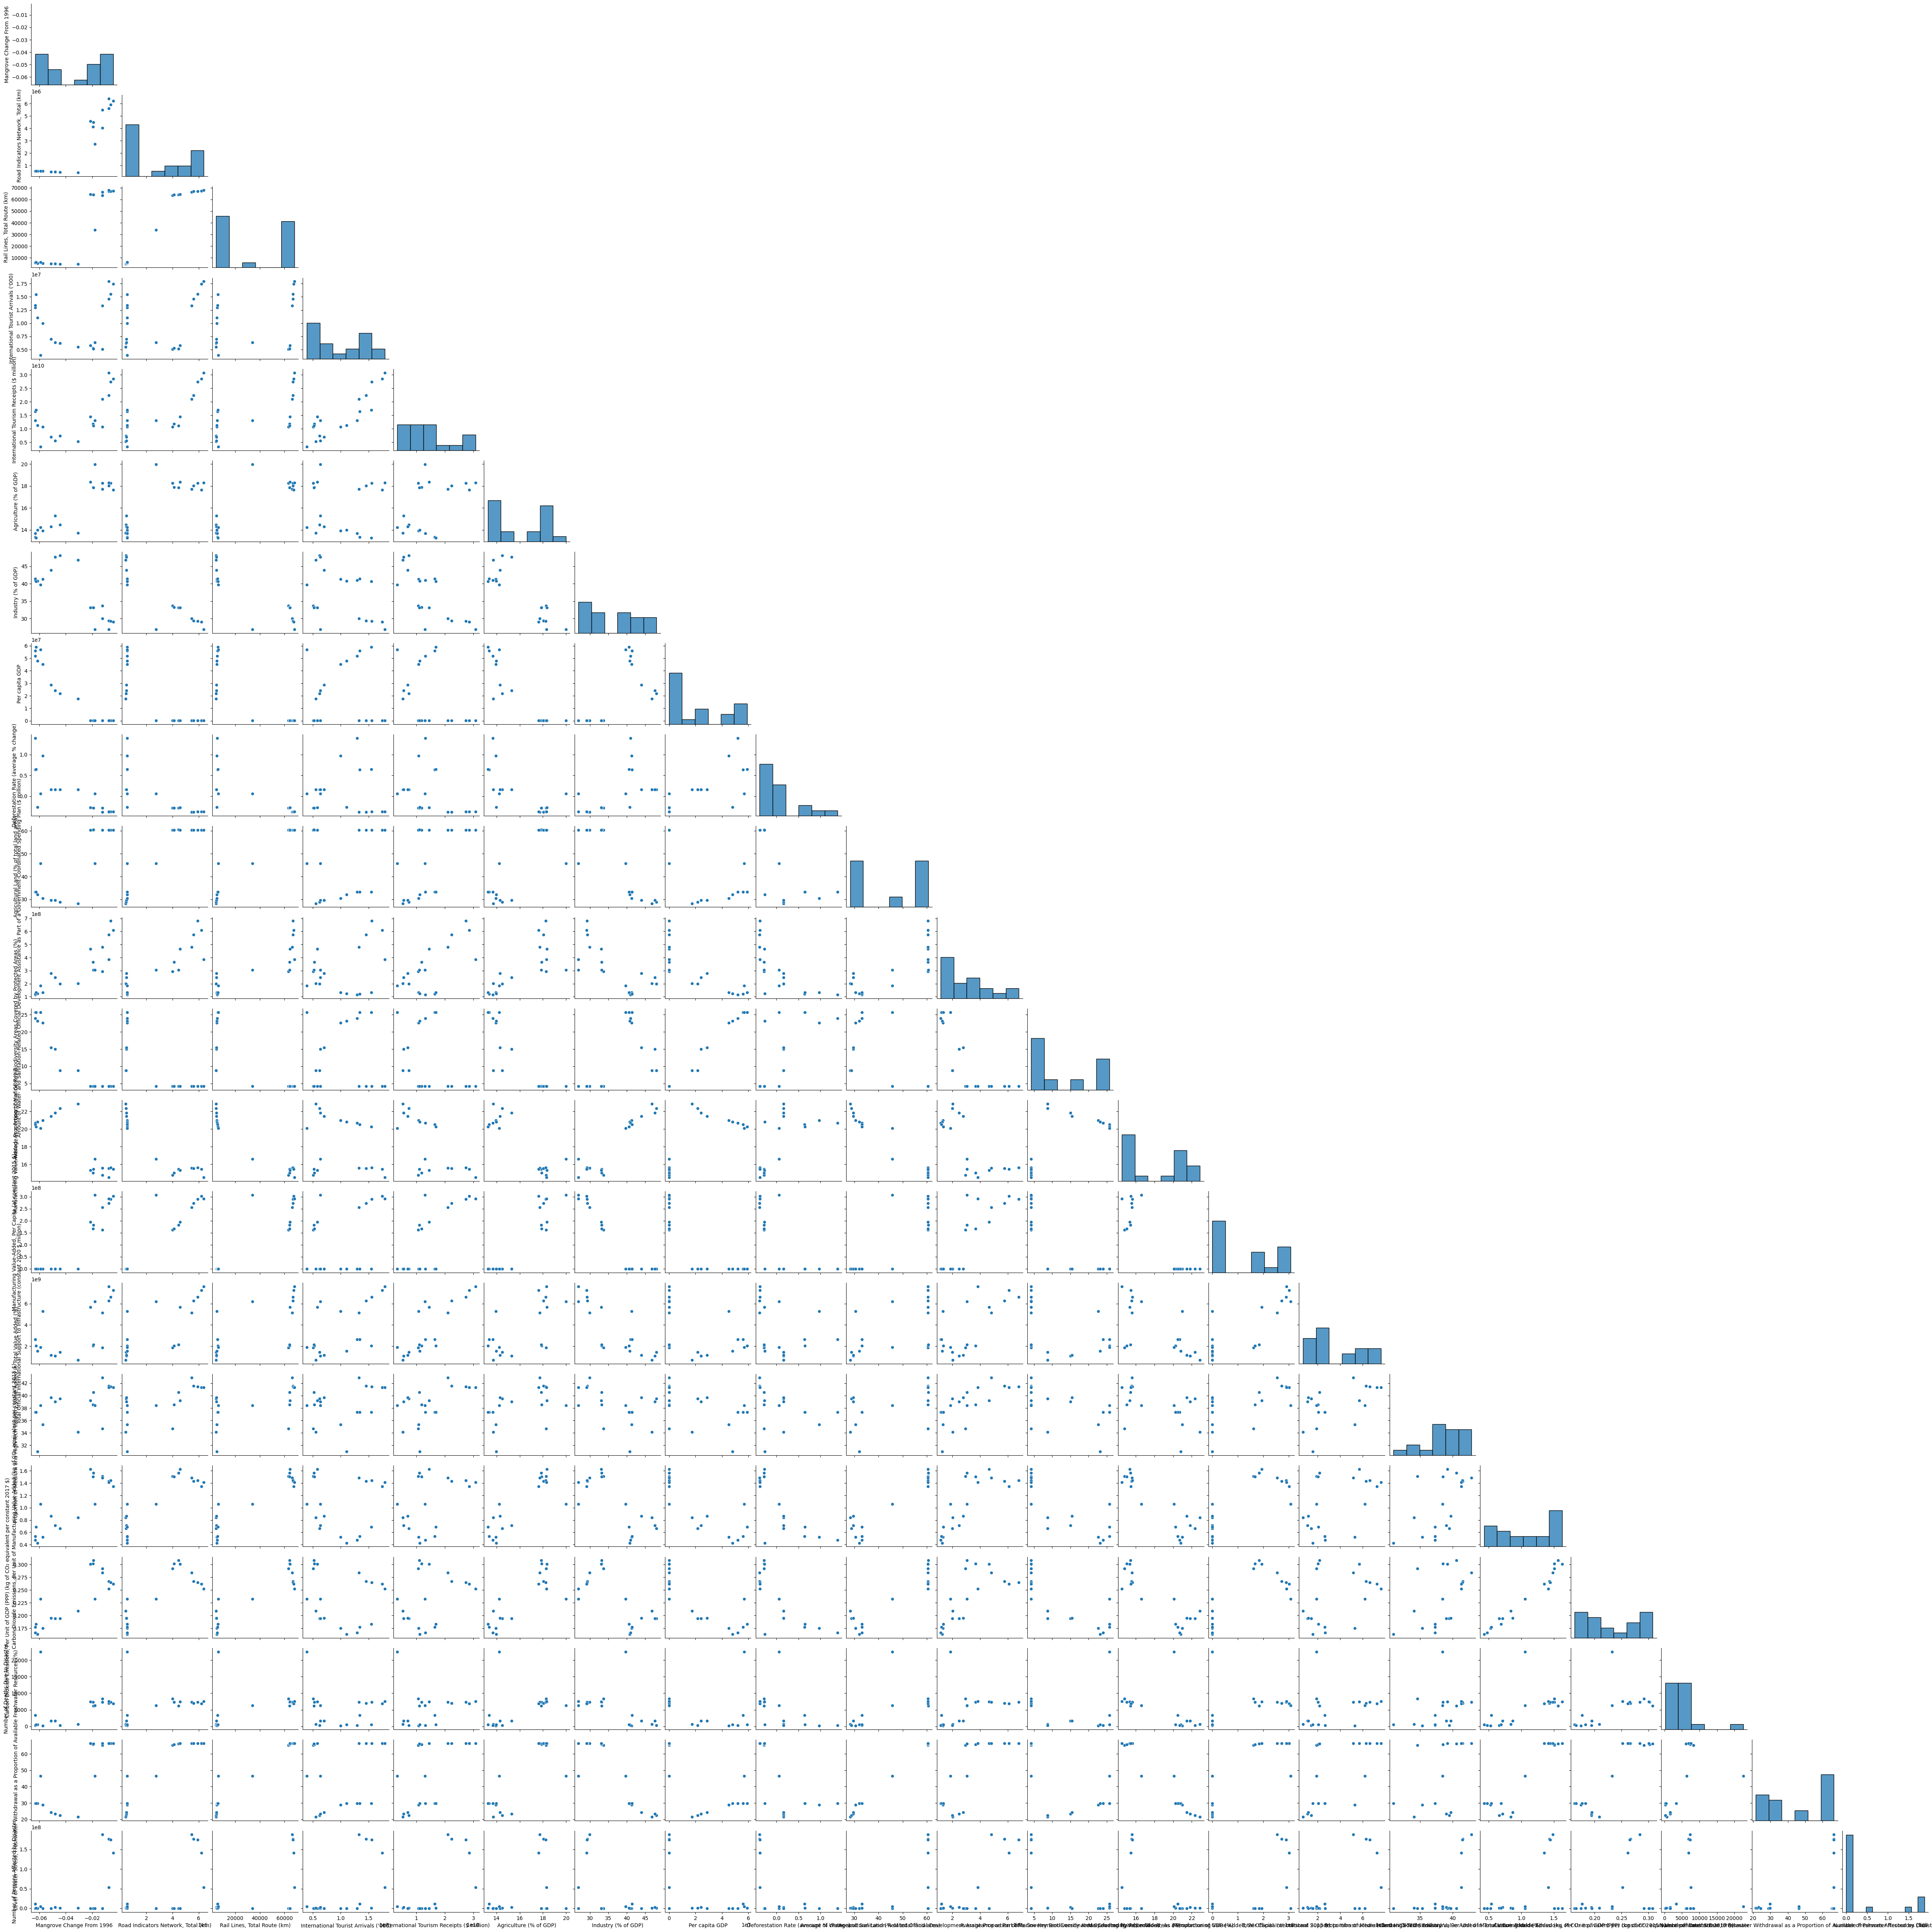

Mangrove Change From 1996 and Road Indicators Network, Total (km) have a correlation of 0.92
Mangrove Change From 1996 and Rail Lines, Total Route (km) have a correlation of 0.92
Mangrove Change From 1996 and Agriculture (% of GDP) have a correlation of 0.90
Mangrove Change From 1996 and Industry (% of GDP) have a correlation of -0.79
Mangrove Change From 1996 and Per capita GDP have a correlation of -0.96
Mangrove Change From 1996 and Deforestation Rate (average % change) have a correlation of -0.77
Mangrove Change From 1996 and Agricultural Land (% of total land area) have a correlation of 0.85
Mangrove Change From 1996 and Amount of Water- and Sanitation-Related Official Development Assistance as Part of a Government-Coordinated Spending Plan ($ million) have a correlation of 0.86
Mangrove Change From 1996 and Average Proportion of Marine Key Biodiversity Areas Covered by Protected Areas (%) have a correlation of -0.95
Mangrove Change From 1996 and Manufacturing Value-Added, As a Pr

In [ ]:
# Calculate the correlation matrix
corr = reg_df_imputed.corr()

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(corr, dtype=bool))

# Create a pairplot
pairplot_fig = sns.pairplot(reg_df_imputed)

# Loop through axes to plot the upper triangle with the correlation values
for i, j in zip(*np.triu_indices_from(pairplot_fig.axes, 1)):
    pairplot_fig.axes[i, j].set_visible(False)
    txt = f'{corr.iloc[i, j]:.2f}'
    pairplot_fig.axes[i, j].text(0.5, 0.5, txt, transform=pairplot_fig.axes[i, j].transAxes,
                                  ha='center', va='center', color='red', fontsize='large')

plt.show()

# Define a threshold for high correlation
threshold = 0.75  # For example, we choose 0.75 as the high correlation threshold

# Find pairs with high correlation
high_corr_pairs = [(reg_df_imputed.columns[x], reg_df_imputed.columns[y], corr.iloc[x, y])
                   for x in range(len(corr.columns))
                   for y in range(x+1, len(corr.columns))
                   if abs(corr.iloc[x, y]) > threshold]

# Print or store the high correlation pairs
for pair in high_corr_pairs:
    print(f"{pair[0]} and {pair[1]} have a correlation of {pair[2]:.2f}")

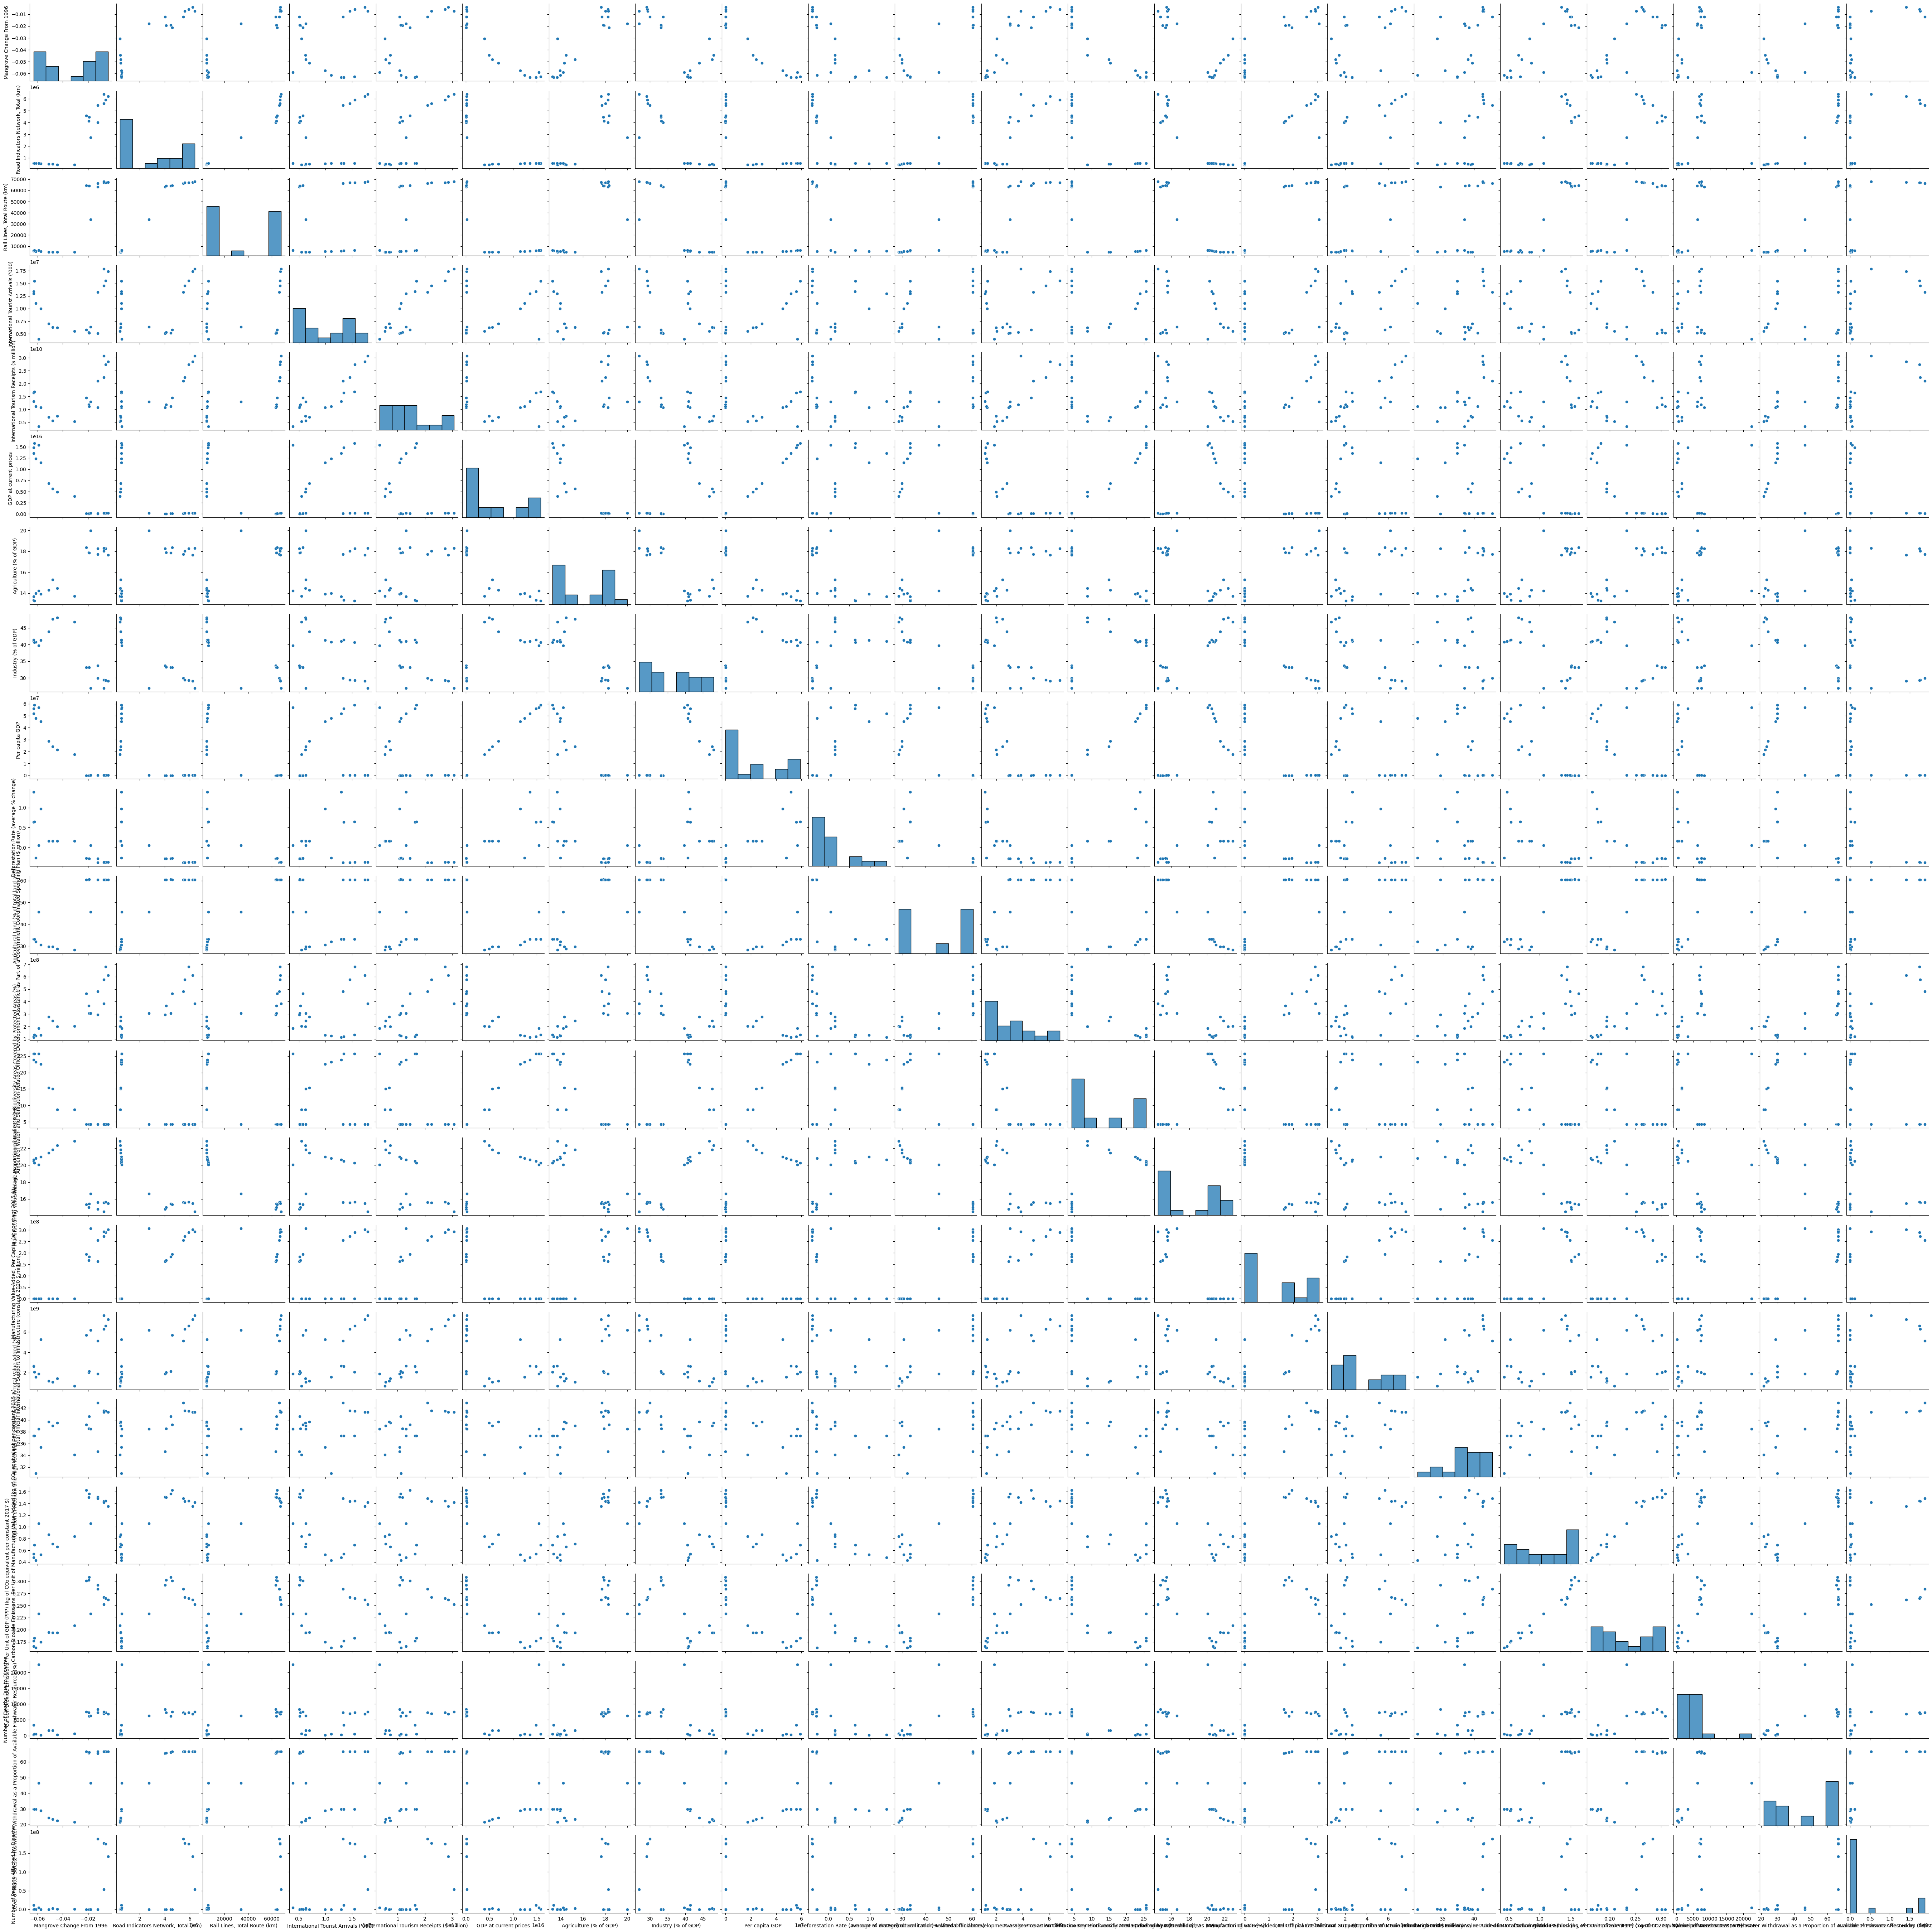

In [ ]:
sns.pairplot(prereg_df_imputed)
plt.show()

### Collecting data on more variables